# Polynomial Regression Tutorial by [Ali Abdelaal](https://www.linkedin.com/in/aliabdelaal/) 
### this tutorial file was made for [Pixels](https://www.facebook.com/PixelsHU/) Course (Machine Learning)
in this tutorial we see how polynomial regression works, and how it affects the model in terms of overfitting.

In [43]:
#Importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [45]:
# features and goal
features = dataset.iloc[:,1:2].values
goals = dataset.iloc[:,-1].values

### We have to actually build the polynomials thems selfs first

In [46]:
# define a function that return whatever degree polynomial you want
def getPolynomial(data,degree=1):
    if degree == 1 :
        return data 
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree= degree)
    poly_features = poly.fit_transform(data)
    return poly_features

In [47]:
# define a function for plotting
def plot(feature = [], actual = [], predicted = [], degree = 1):
    plt.plot(feature, actual, '.', feature, predicted, '-')
    plt.title('model of degree = %d'%(degree))
    plt.show()

In [48]:
# get polynonmials
poly_features = []
for degree in range(1,15):
    poly_features.append(getPolynomial(features, degree=degree))
pd.DataFrame(poly_features[10])

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,1.000000e+00,1.000000e+00
1,1.0,2.0,4.0,8.0,16.0,32.0,64.0,128.0,256.0,5.120000e+02,1.024000e+03,2.048000e+03
2,1.0,3.0,9.0,27.0,81.0,243.0,729.0,2187.0,6561.0,1.968300e+04,5.904900e+04,1.771470e+05
3,1.0,4.0,16.0,64.0,256.0,1024.0,4096.0,16384.0,65536.0,2.621440e+05,1.048576e+06,4.194304e+06
4,1.0,5.0,25.0,125.0,625.0,3125.0,15625.0,78125.0,390625.0,1.953125e+06,9.765625e+06,4.882812e+07
5,1.0,6.0,36.0,216.0,1296.0,7776.0,46656.0,279936.0,1679616.0,1.007770e+07,6.046618e+07,3.627971e+08
6,1.0,7.0,49.0,343.0,2401.0,16807.0,117649.0,823543.0,5764801.0,4.035361e+07,2.824752e+08,1.977327e+09
7,1.0,8.0,64.0,512.0,4096.0,32768.0,262144.0,2097152.0,16777216.0,1.342177e+08,1.073742e+09,8.589935e+09
8,1.0,9.0,81.0,729.0,6561.0,59049.0,531441.0,4782969.0,43046721.0,3.874205e+08,3.486784e+09,3.138106e+10
9,1.0,10.0,100.0,1000.0,10000.0,100000.0,1000000.0,10000000.0,100000000.0,1.000000e+09,1.000000e+10,1.000000e+11


## Now let's take a look !

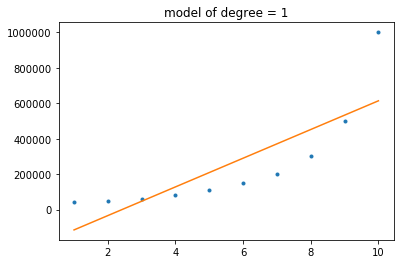

In [49]:
# import the model
from sklearn.linear_model import LinearRegression
simple_model = LinearRegression(normalize=True)
simple_model.fit(poly_features[0], goals)
plot(poly_features[0], goals, simple_model.predict(poly_features[0]),1)

## Let's see it growing !

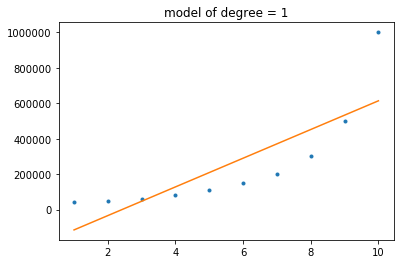

-------------------------


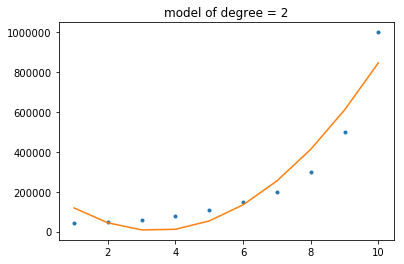

-------------------------


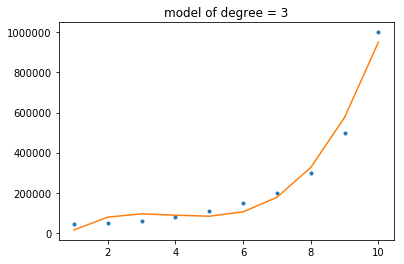

-------------------------


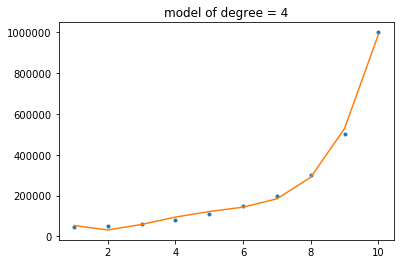

-------------------------


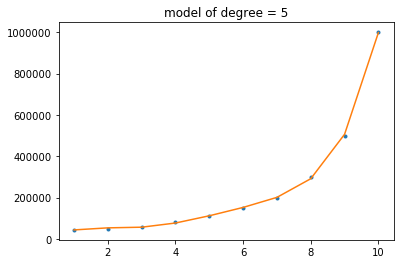

-------------------------


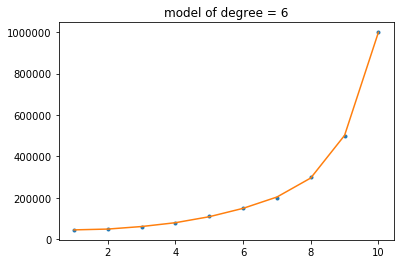

-------------------------


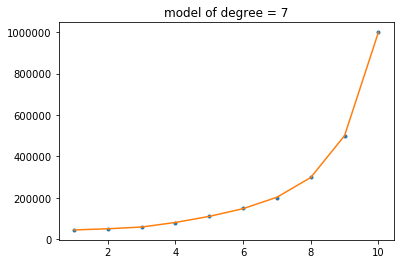

-------------------------


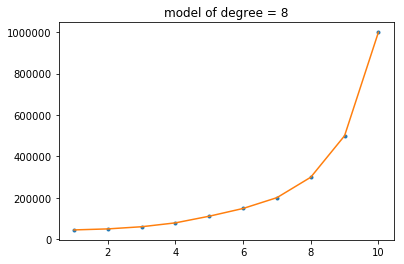

-------------------------


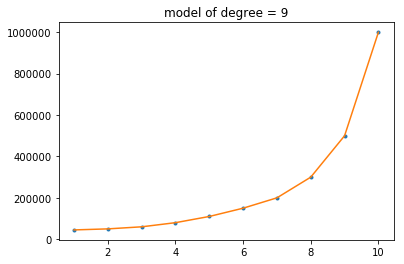

-------------------------


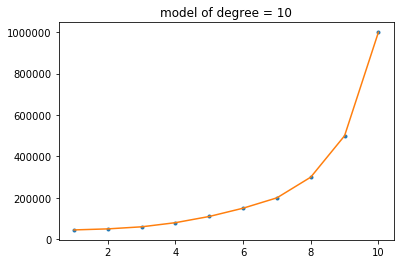

-------------------------


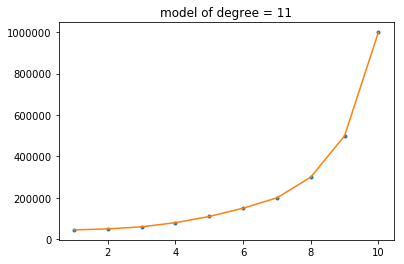

-------------------------


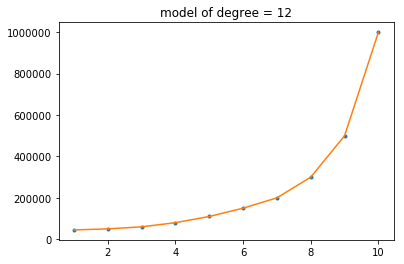

-------------------------


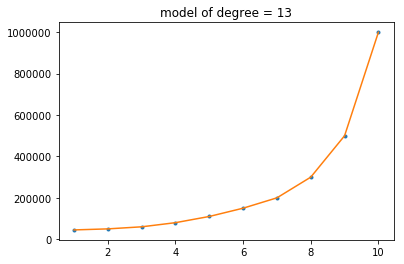

-------------------------


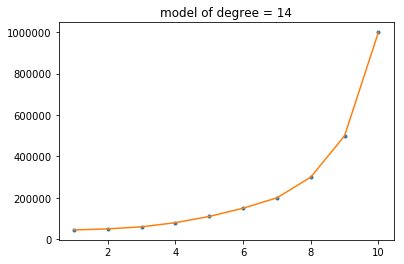

-------------------------


In [50]:
for degree in range(0,len(poly_features)):
    simple_model.fit(poly_features[degree], goals)
    plot(poly_features[0],goals,simple_model.predict(poly_features[degree]),degree+1)
    print("-------------------------")

## Let's try it on different data !

In [51]:
salaries = pd.read_csv('Salary_Data.csv')
salaries

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [52]:
features = salaries.iloc[:,:-1].values
goal_2 = salaries.iloc[:,-1].values
poly_levels = []
for degree in range(1,14):
    poly_levels.append(getPolynomial(features, degree))
pd.DataFrame(poly_levels[12])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,1.1,1.21,1.331,1.4641,1.61051,1.771561e+00,1.948717e+00,2.143589e+00,2.357948e+00,2.593742e+00,2.853117e+00,3.138428e+00,3.452271e+00
1,1.0,1.3,1.69,2.197,2.8561,3.71293,4.826809e+00,6.274852e+00,8.157307e+00,1.060450e+01,1.378585e+01,1.792160e+01,2.329809e+01,3.028751e+01
2,1.0,1.5,2.25,3.375,5.0625,7.59375,1.139062e+01,1.708594e+01,2.562891e+01,3.844336e+01,5.766504e+01,8.649756e+01,1.297463e+02,1.946195e+02
3,1.0,2.0,4.00,8.000,16.0000,32.00000,6.400000e+01,1.280000e+02,2.560000e+02,5.120000e+02,1.024000e+03,2.048000e+03,4.096000e+03,8.192000e+03
4,1.0,2.2,4.84,10.648,23.4256,51.53632,1.133799e+02,2.494358e+02,5.487587e+02,1.207269e+03,2.655992e+03,5.843183e+03,1.285500e+04,2.828101e+04
5,1.0,2.9,8.41,24.389,70.7281,205.11149,5.948233e+02,1.724988e+03,5.002464e+03,1.450715e+04,4.207072e+04,1.220051e+05,3.538148e+05,1.026063e+06
6,1.0,3.0,9.00,27.000,81.0000,243.00000,7.290000e+02,2.187000e+03,6.561000e+03,1.968300e+04,5.904900e+04,1.771470e+05,5.314410e+05,1.594323e+06
7,1.0,3.2,10.24,32.768,104.8576,335.54432,1.073742e+03,3.435974e+03,1.099512e+04,3.518437e+04,1.125900e+05,3.602880e+05,1.152922e+06,3.689349e+06
8,1.0,3.2,10.24,32.768,104.8576,335.54432,1.073742e+03,3.435974e+03,1.099512e+04,3.518437e+04,1.125900e+05,3.602880e+05,1.152922e+06,3.689349e+06
9,1.0,3.7,13.69,50.653,187.4161,693.43957,2.565726e+03,9.493188e+03,3.512479e+04,1.299617e+05,4.808584e+05,1.779176e+06,6.582952e+06,2.435692e+07


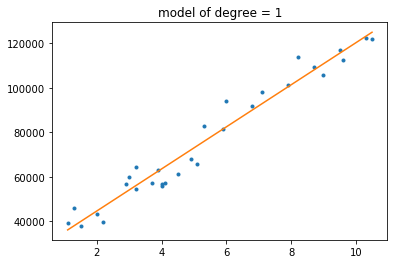

-------------------------


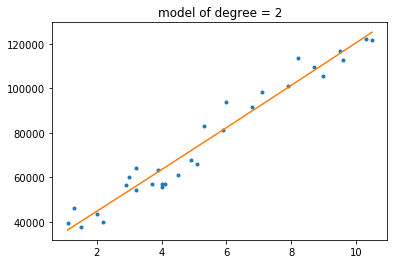

-------------------------


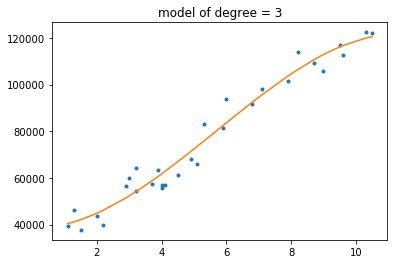

-------------------------


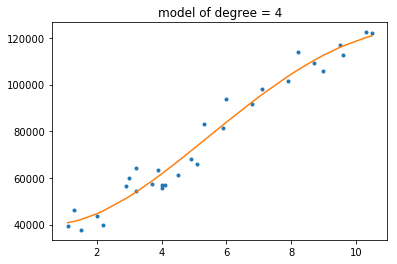

-------------------------


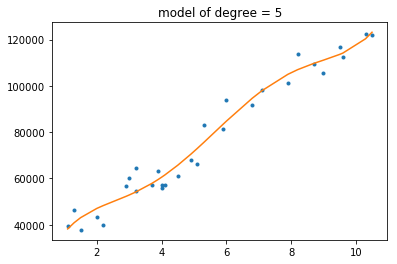

-------------------------


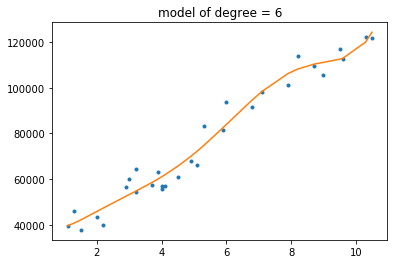

-------------------------


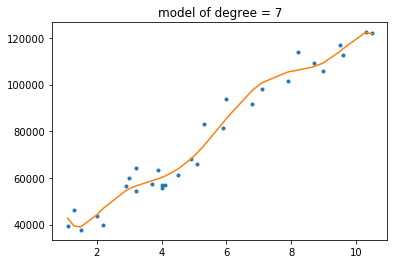

-------------------------


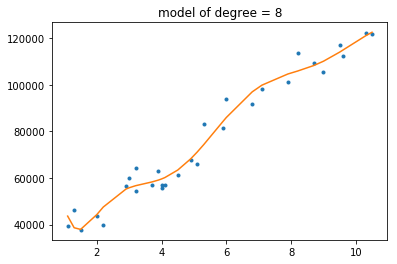

-------------------------


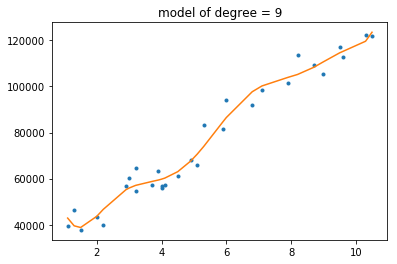

-------------------------


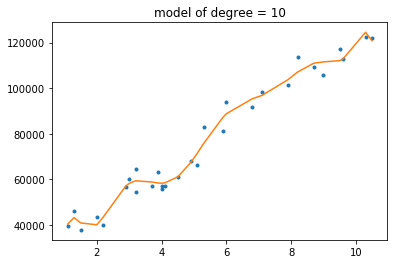

-------------------------


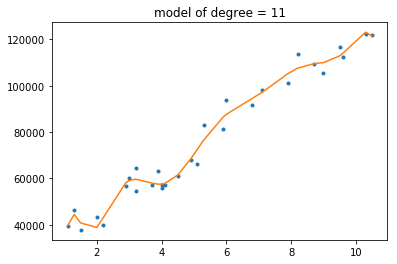

-------------------------


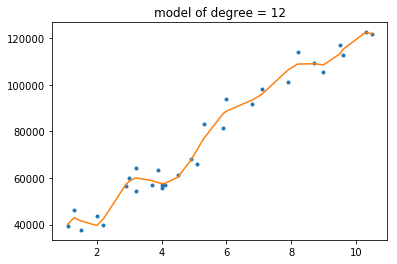

-------------------------


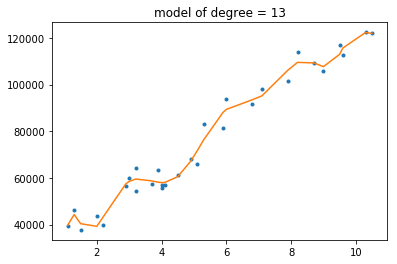

-------------------------


In [53]:
coeff_array = []
for degree in range(0,len(poly_levels)):
    simple_model.fit(poly_levels[degree], goal_2)
    plot(poly_levels[0],goal_2,simple_model.predict(poly_levels[degree]),degree+1)
    coeff_array.append(simple_model.coef_)
    print("-------------------------")

In [54]:
pd.DataFrame(coeff_array)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,9449.962321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,9.259284e+03,1.639257e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000,-7.187084e+02,2.099352e+03,-1.229154e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000000,-3.314246e+03,2.979912e+03,-2.365864e+02,4.924292e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000000,4.365196e+04,-1.936768e+04,4.409707e+03,-4.301255e+02,1.500642e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.000000,-1.364761e+04,1.620713e+04,-6.060308e+03,1.143825e+03,-1.015459e+02,3.366699e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.000000,-3.362923e+05,2.653996e+05,-1.022276e+05,2.149072e+04,-2.494345e+03,1.498702e+02,-3.637197,NaN,NaN,NaN,NaN,NaN,NaN
7,0.000000,-5.770666e+05,4.873117e+05,-2.085187e+05,5.077850e+04,-7.300867e+03,6.130928e+02,-27.802580,0.526087,NaN,NaN,NaN,NaN,NaN
8,0.000000,-1.093144e+05,-1.266686e+04,7.771248e+04,-4.680873e+04,1.342830e+04,-2.152274e+03,197.194737,-9.667440,0.196967,NaN,NaN,NaN,NaN
9,0.000000,3.669052e+06,-4.604325e+06,3.136612e+06,-1.292184e+06,3.394930e+05,-5.812674e+04,6456.608418,-448.446806,17.692156,-0.302587,NaN,NaN,NaN


# Well,See what happens to the weights as the model complexity increases ?